# Zones and Filtering

Introduction on data-filtereing

Author: *Thomas Haslwanter*, Date: *May-2015*

In [1]:
import sys
sys.version

'2.7.9 (default, Dec 10 2014, 12:24:55) [MSC v.1500 32 bit (Intel)]'

In [2]:
%pylab inline
import os
#import cv2
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.ndimage import convolve

Populating the interactive namespace from numpy and matplotlib


## Get the data, and convert them to gray & uint8

D:\WinPython-32bit-2.7.9.4\python-2.7.9\lib\site-packages\skimage\util\dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


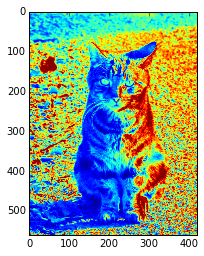

In [3]:
inDir = (r'..\..\Images')
inFile = 'cat.jpg'
data = imread(os.path.join(inDir,inFile))

data_g = rgb2gray(data)
data_u = img_as_ubyte(data_g)
imshow(data_u)

In [4]:
type(data_g[0,0])
plt.set_cmap('gray')

## Create 3 filters, and filter the data

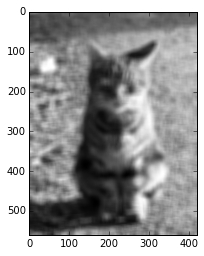

In [5]:
# Create the Filters
Filters = list()
Filters.append(array([[1.]]))
Filters.append(ones((7,7))/49.)
Filters.append(ones((15,15))/225.)

# Apply them
Filtered = list()
for ii in arange(3):
    #Filtered.append(cv2.filter2D((data_u), cv2.CV_32F, Filters[ii]))
    Filtered.append(convolve(data_u.astype(float), Filters[ii]))

# Show the last filtered output
imshow(Filtered[2])

## Create 3 zones

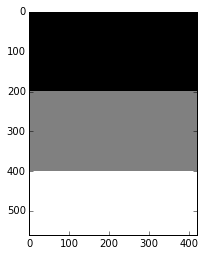

In [6]:
Zones = zeros(data_g.shape, dtype=uint8)
Zones[200:,:]=1
Zones[400:,:]=2
imshow(Zones)

## Apply the corresponding filter to each zone

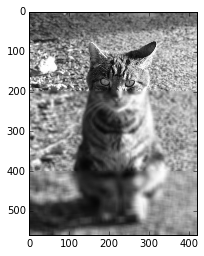

In [7]:
final = zeros(data_u.shape, dtype = uint8)
for ii in arange(3):
    final[Zones==ii] = Filtered[ii][Zones==ii]
imshow(final)